In [96]:
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import json
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

engines = ['ada', 'babbage', 'curie', 'davinci']

In [80]:
def plot_distributions(points_1, points_2):
    fig, ax = plt.subplots()

    ax.scatter(points_1[:,0], points_1[:, 1], color='blue')
    ax.scatter(points_2[:,0], points_2[:, 1], color='red')
    plt.show()

# (1)

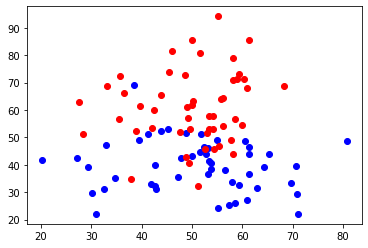

In [84]:
plot_distributions(multivariate_normal.rvs([50, 40], [[160, 0], [0, 80]], size=50,
                                            random_state=55),
                    multivariate_normal.rvs([50, 60], [[80, 0], [0, 160]], size=50,
                                            random_state=56))

# (2)

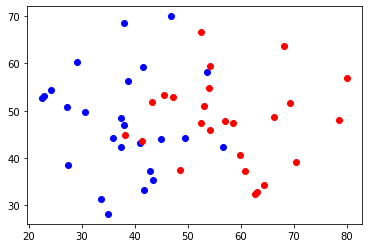

In [12]:
plot_distributions(multivariate_normal.rvs([40, 50], [[80, 0], [0, 160]], size=25,
                                            random_state=42),
                    multivariate_normal.rvs([60, 50], [[160, 0], [0, 80]], size=25,
                                            random_state=43))

# (3)

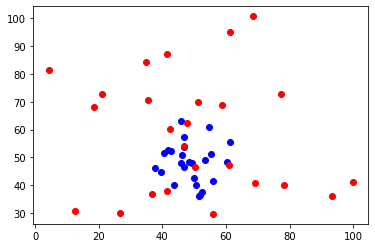

In [85]:
def push_away(point):
    x, y = point
    return [(x-50)*9+ x, (y-50)*9 + y]

plot_distributions(multivariate_normal.rvs([50, 50],
                                            [[50, 0], [0, 50]],
                                            size=25,
                                            random_state=42),
                    np.array([push_away(x) for x in multivariate_normal.rvs(
                                            [50, 50],
                                            [[5, 0], [0, 5]],
                                            size=25,
                                            random_state=43)]))

# (4)

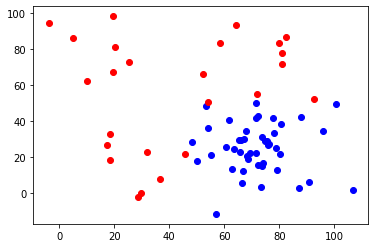

In [87]:
var = 200
mixture = np.concatenate((
                            multivariate_normal.rvs([25, 25], [[var, 0], [0, var]], size=25, random_state=42),
                            multivariate_normal.rvs([25, 75], [[var, 0], [0, var]], size=25, random_state=43),
                            multivariate_normal.rvs([75, 75], [[var, 0], [0, var]], size=25, random_state=44)
                        ))

indices = np.random.choice(mixture.shape[0], 25, replace=False)
mixture_sample = mixture[indices]

plot_distributions(multivariate_normal.rvs([75, 25], [[var, 0], [0, var]], size=45, random_state=45),
                    mixture_sample)

# (5)

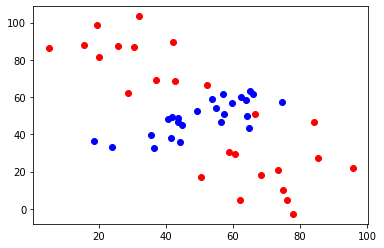

In [88]:
var = 200
mixture = np.concatenate((
                            multivariate_normal.rvs([75, 25], [[var, 0], [0, var]], size=25, random_state=42),
                            multivariate_normal.rvs([25, 75], [[var, 0], [0, var]], size=25, random_state=43),
                        ))

indices = np.random.choice(mixture.shape[0], 25, replace=False)
mixture_sample = mixture[indices]

plot_distributions(multivariate_normal.rvs([50, 50], [[var, 120], [120, var/2]], size=25, random_state=44),
                    mixture_sample)

# (6)

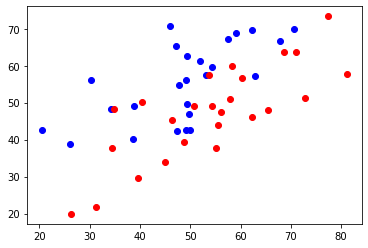

In [89]:
var = 200
plot_distributions(multivariate_normal.rvs([45, 55], [[var, 120], [120, var/1.5]], size=25, random_state=42),
                    multivariate_normal.rvs([55, 45], [[var, 120], [120, var/1.5]], size=25, random_state=43))

# (7)

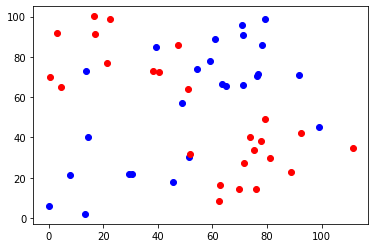

In [90]:
var = 200
mixture1 = np.concatenate((
                            multivariate_normal.rvs([25, 25], [[var, 0], [0, var]], size=25, random_state=42),
                            multivariate_normal.rvs([75, 75], [[var, 0], [0, var]], size=25, random_state=43),
                        ))

indices = np.random.choice(mixture1.shape[0], 25, replace=False)
mixture_sample1 = mixture1[indices]

mixture2 = np.concatenate((
                            multivariate_normal.rvs([75, 25], [[var, 0], [0, var]], size=44),
                            multivariate_normal.rvs([25, 75], [[var, 0], [0, var]], size=45),
                        ))

indices = np.random.choice(mixture2.shape[0], 25, replace=False)
mixture_sample2 = mixture2[indices]

plot_distributions(mixture_sample1,
                    mixture_sample2)

# (8)

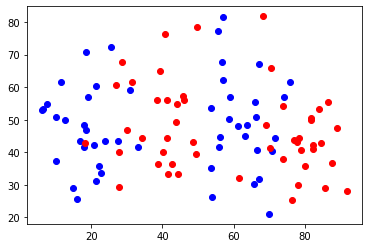

In [93]:
var = 200
mixture1 = np.concatenate((
                            multivariate_normal.rvs([20, 50], [[var/4, 0], [0, var]], size=25, random_state=42),
                            multivariate_normal.rvs([60, 50], [[var/4, 0], [0, var]], size=25, random_state=43),
                        ))

indices = np.random.choice(mixture1.shape[0], 50, replace=False)
mixture_sample1 = mixture1[indices]

mixture2 = np.concatenate((
                            multivariate_normal.rvs([40, 50], [[var/4, 0], [0, var]], size=25, random_state=44),
                            multivariate_normal.rvs([80, 50], [[var/4, 0], [0, var]], size=25, random_state=45),
                        ))

indices = np.random.choice(mixture2.shape[0], 50, replace=False)
mixture_sample2 = mixture2[indices]

plot_distributions(mixture_sample1,
                    mixture_sample2)

# (9)

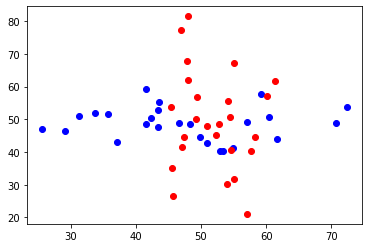

In [94]:
var = 200
plot_distributions(multivariate_normal.rvs([50, 50], [[var, 0], [0, var/8]], size=25, random_state=42),
                    multivariate_normal.rvs([50, 50], [[var/8, 0], [0, var]], size=25, random_state=43))

## Testing:

In [107]:
from collections import defaultdict

experiment_names = [f'2d_class_type_{x}_rstate_' for x in range(1,3)]

results = dict()

rstates = ['42', '55', '93']
with open('experiments_log.json', 'r') as file:
    experiments = json.loads(file.read())

for name in experiment_names:
    results[name] = defaultdict(list)
    print(f'{name}:')
    print('-----')

    for rstate in rstates:
        experiment = experiments[name + rstate]

        x_train = experiment['input_train']
        y_train = experiment['output_train']
        x_test = experiment['input_test']
        y_test = experiment['output_test']

        neigh = KNeighborsClassifier(n_neighbors=5)
        neigh.fit(x_train, y_train)
        print(f'knn {neigh.score(x_test, y_test)}')
        results[name]['knn'].append(neigh.score(x_test, y_test))

        sc = StandardScaler()
        x_train = sc.fit_transform(x_train)
        x_test = sc.transform(x_test)

        classifier = LogisticRegression(random_state = 0, solver='lbfgs',
                                            multi_class='auto')
        classifier.fit(x_train, y_train)

        print(f'lr {classifier.score(x_test, y_test)}')

        results[name]['lr'].append(classifier.score(x_test, y_test))

        for engine in engines:
            gpt_preds = experiment[f'output_test_cleaned_{engine}']
            accurate = [1 if x==y else 0
                        for x, y in zip(y_test, gpt_preds)]
            print(name, engine, sum(accurate)/len(accurate))
            results[name][engine].append(sum(accurate)/len(accurate))
    print('----')



2d_class_type_1_rstate_:
-----
knn 0.7333333333333333
lr 0.7333333333333333
2d_class_type_1_rstate_ ada 0.7
2d_class_type_1_rstate_ babbage 0.6
2d_class_type_1_rstate_ curie 0.7
2d_class_type_1_rstate_ davinci 0.6666666666666666
knn 0.7333333333333333
lr 0.8
2d_class_type_1_rstate_ ada 0.9
2d_class_type_1_rstate_ babbage 0.5
2d_class_type_1_rstate_ curie 0.8
2d_class_type_1_rstate_ davinci 0.6
knn 0.8
lr 0.7333333333333333
2d_class_type_1_rstate_ ada 0.8
2d_class_type_1_rstate_ babbage 0.8
2d_class_type_1_rstate_ curie 0.8
2d_class_type_1_rstate_ davinci 0.7666666666666667
----
2d_class_type_2_rstate_:
-----
knn 0.7666666666666667
lr 0.8333333333333334
2d_class_type_2_rstate_ ada 0.7666666666666667
2d_class_type_2_rstate_ babbage 0.7333333333333333
2d_class_type_2_rstate_ curie 0.7
2d_class_type_2_rstate_ davinci 0.8
knn 0.8333333333333334
lr 0.9
2d_class_type_2_rstate_ ada 0.5333333333333333
2d_class_type_2_rstate_ babbage 0.5
2d_class_type_2_rstate_ curie 0.6666666666666666
2d_class_

In [108]:
results

{'2d_class_type_1_rstate_': defaultdict(list,
             {'knn': [0.7333333333333333, 0.7333333333333333, 0.8],
              'lr': [0.7333333333333333, 0.8, 0.7333333333333333],
              'ada': [0.7, 0.9, 0.8],
              'babbage': [0.6, 0.5, 0.8],
              'curie': [0.7, 0.8, 0.8],
              'davinci': [0.6666666666666666, 0.6, 0.7666666666666667]}),
 '2d_class_type_2_rstate_': defaultdict(list,
             {'knn': [0.7666666666666667,
               0.8333333333333334,
               0.7666666666666667],
              'lr': [0.8333333333333334, 0.9, 0.6333333333333333],
              'ada': [0.7666666666666667,
               0.5333333333333333,
               0.7333333333333333],
              'babbage': [0.7333333333333333, 0.5, 0.6333333333333333],
              'curie': [0.7, 0.6666666666666666, 0.7666666666666667],
              'davinci': [0.8, 0.7666666666666667, 0.7333333333333333]})}